In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from pandas.plotting import scatter_matrix, parallel_coordinates
from sklearn.decomposition import PCA

In [7]:
import plotly.express as px

df = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [8]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


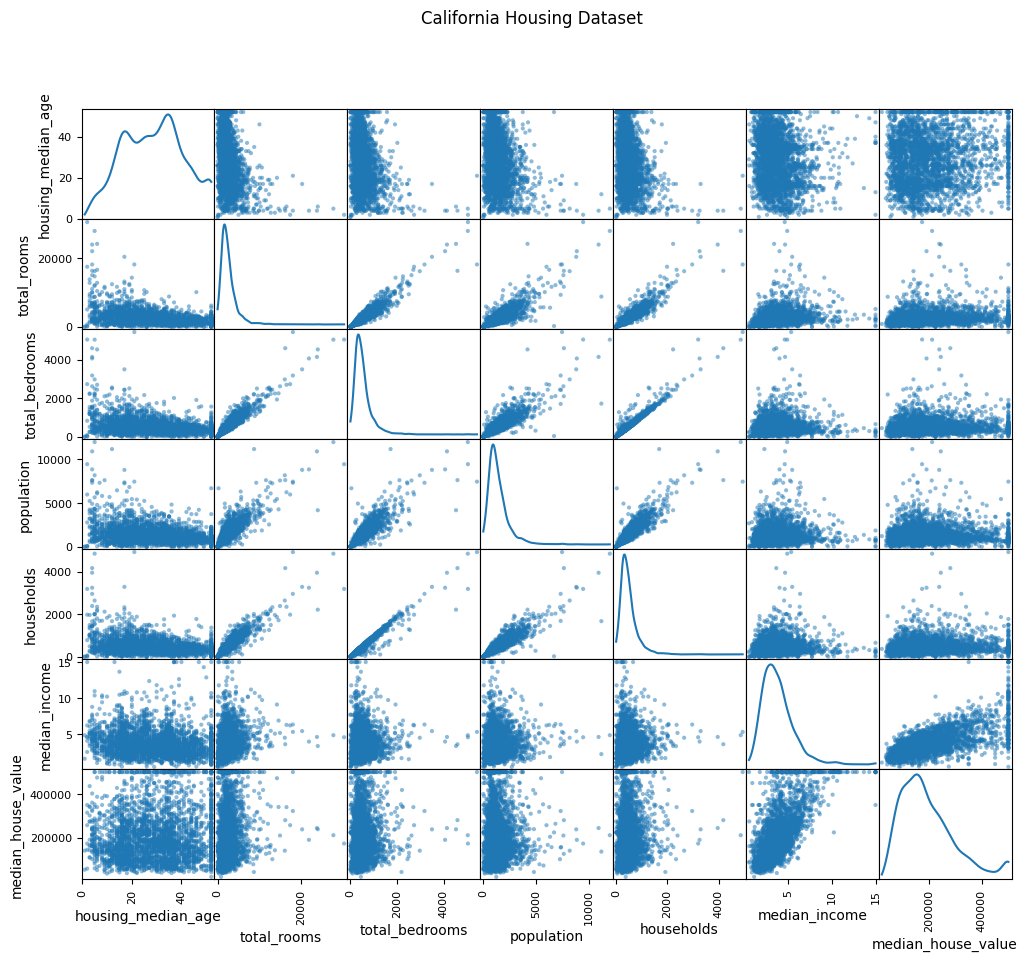

In [9]:
scatter_matrix(df.iloc[:,2:], figsize=(12,10), diagonal='kde')
plt.suptitle("California Housing Dataset")
plt.show()

In [ ]:
plt.figure(figsize=(12,16))

parallel_coordinates(df, 'median_house_value')
plt.show()

In [12]:
df['Income_Category'] = pd.qcut(df['median_income'], q=4, labels=["Low", "Medium", "High", "Very High"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           3000 non-null   float64 
 1   latitude            3000 non-null   float64 
 2   housing_median_age  3000 non-null   float64 
 3   total_rooms         3000 non-null   float64 
 4   total_bedrooms      3000 non-null   float64 
 5   population          3000 non-null   float64 
 6   households          3000 non-null   float64 
 7   median_income       3000 non-null   float64 
 8   median_house_value  3000 non-null   float64 
 9   Income_Category     3000 non-null   category
dtypes: category(1), float64(9)
memory usage: 214.2 KB


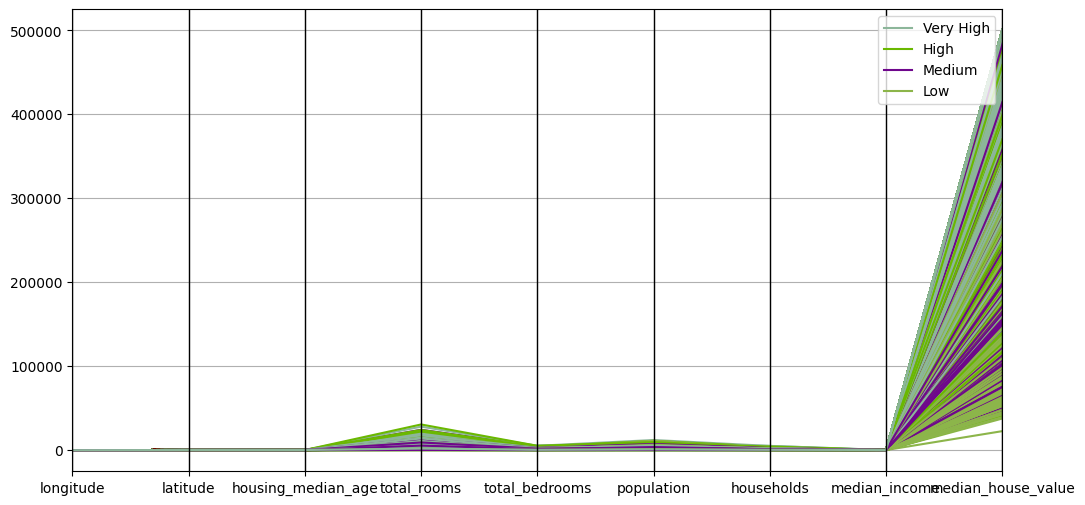

In [27]:
plt.figure(figsize=(12,6))
parallel_coordinates(df, 'Income_Category')
plt.show()

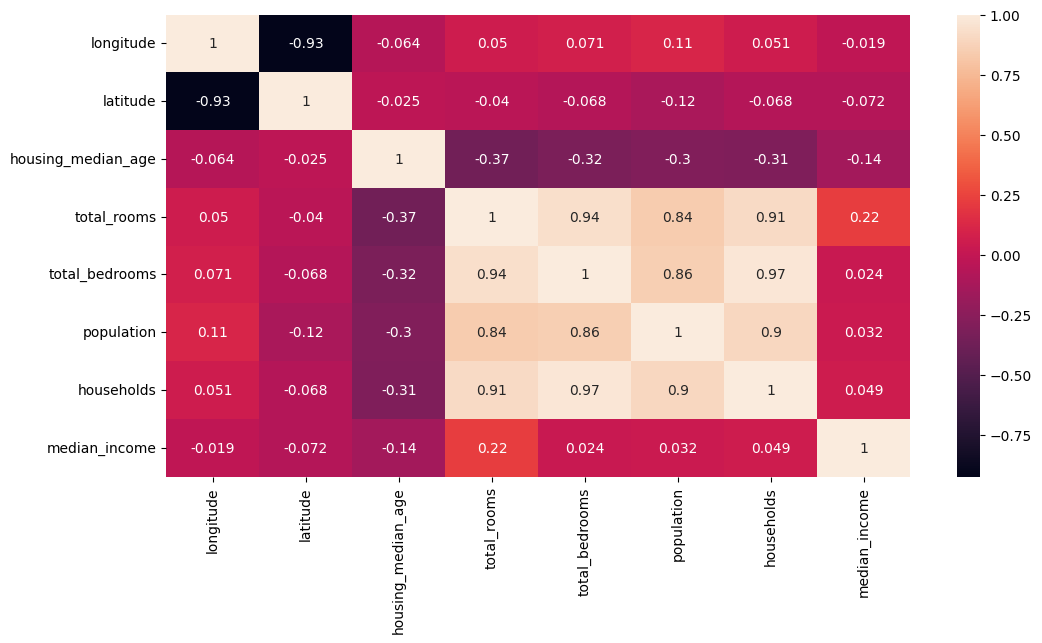

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df.iloc[:,:-2].corr(), annot=True)
plt.show()

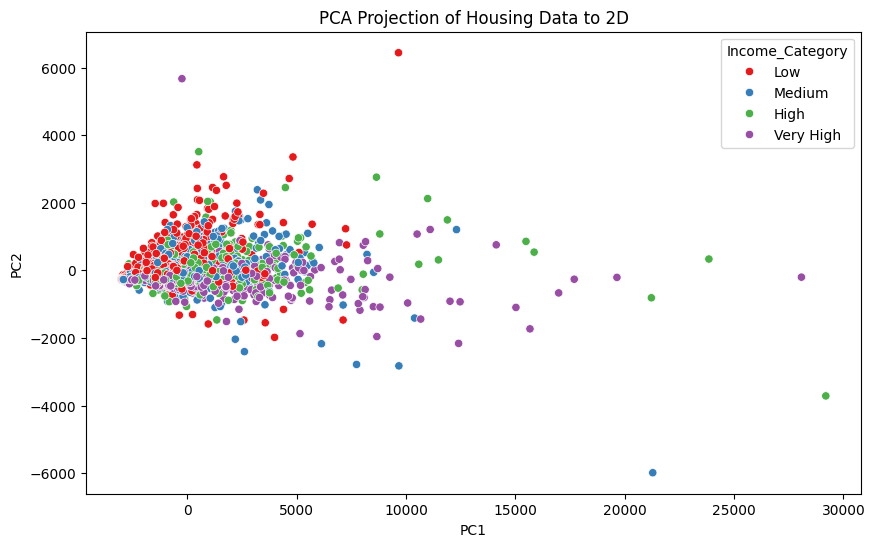

In [31]:
features = df.drop(columns=['median_house_value', 'Income_Category'])

pca = PCA(n_components=2)
housing_pca = pca.fit_transform(features)

pca_df = pd.DataFrame(data=housing_pca, columns=['PC1', 'PC2'])

pca_df['Income_Category'] = df['Income_Category']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Income_Category',
    data=pca_df,
    palette='Set1'
)
plt.title("PCA Projection of Housing Data to 2D")
plt.show()


In [33]:
from pandas.plotting import radviz

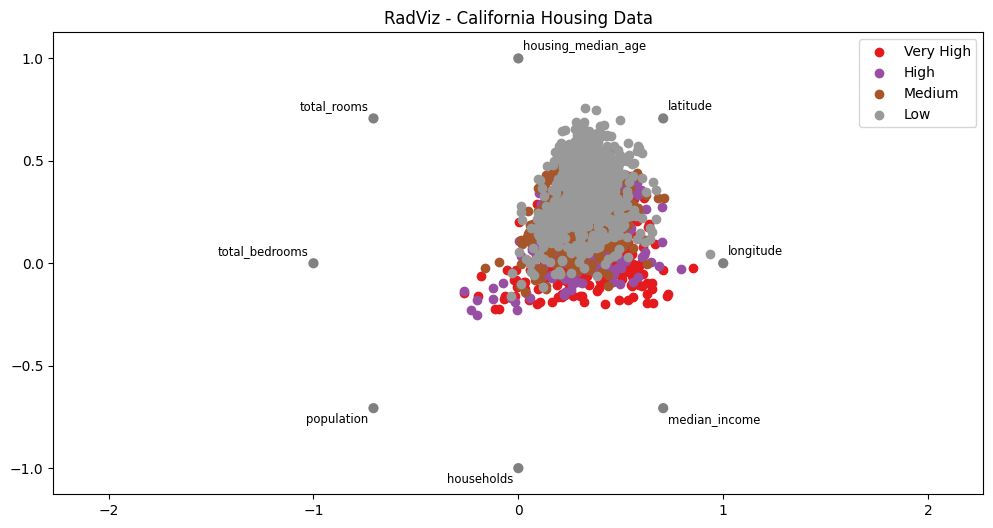

In [34]:
plt.figure(figsize=(12, 6))
radviz(
    df.drop(columns=['median_house_value']),  # drop median_house_value
    'Income_Category',
    colormap="Set1"
)
plt.title("RadViz - California Housing Data")
plt.show()